In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math

# Logistic Function
We don't want continous values like in LR, just probabilities. So we use the Sigmoid fn.

# Logit
Log of odds\
Natural log to scale from -$\infty$ to $\infty$

In [128]:
logit = lambda p:math.log(p/(1-p))

In [129]:
print(
logit(0.1),
logit(0.5),
logit(0.9)
)

-2.197224577336219 0.0 2.1972245773362196


In [146]:
range_ = np.array(range(1, 1000)) / 1000
ys = [logit(p) for p in range_]

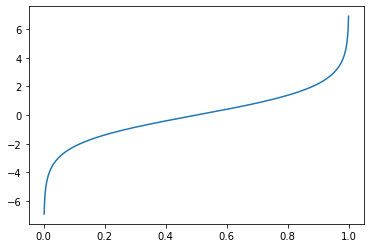

In [153]:
plt.plot(range_, ys)

# Sigmoid
Inverse of Logit

In [130]:
sigmoid = lambda p:1/(1+np.exp(-p))

In [147]:
print(
sigmoid(-5),
sigmoid(0),
sigmoid(5)
)

0.0066928509242848554 0.5 0.9933071490757153


In [161]:
range_ = np.array(range(-10, 10))
ys = [sigmoid(p) for p in range_]

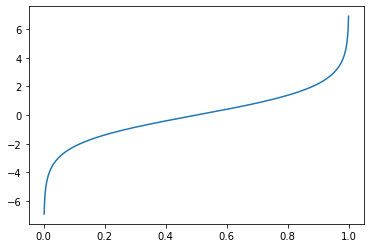

In [160]:
plt.plot(range_, ys)

In [43]:
data = datasets.load_breast_cancer()
X = data["data"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

$\frac{1}{N}\epsilon{-2x_i(y_i-(wx_i+b))}$

$\frac{1}{N}\epsilon{-2(y_i-(wx_i+b))}$

In [85]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = np.shape(X)
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            pred__y = np.dot(X, self.weights) + self.bias
            pred_y = self.sigmoid(pred__y)
            
            dw = (2/n_samples) * np.dot(X.T, (pred_y - y))
            db = (2/n_samples) * np.sum((pred_y - y))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        pred__y = np.dot(X, self.weights) + self.bias
        pred_y = self.sigmoid(pred__y)
        return [1 if y>=0.5 else 0 for y in pred_y]

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

C:\Users\kavis\AppData\Local\Temp\ipykernel_7464\3861074126.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [89]:
np.sum(pred == y_test)/len(pred)

0.925531914893617

## Binary Entropy Loss Function

In [37]:
loss = lambda y, y_hat: -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
loss(np.array([1,3]), np.array([0.7,0.2]))

2.8156378919347262